In [21]:
#In this general ARIMA process here are the steps i follow 
#Visualizing the time series data
#making the time series data stationary if it is not stationary 
#plotting the correlation and autocorrelation charts
#constructing the ARIMA or Seasonal ARIMA based on the data
#using the model to predict future sales 
import pandas as pd

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df=pd.read_csv("sales.csv")

In [24]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [25]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [26]:
#DATA CLEANING
df.columns=['Month','champagne_sales']
#removing data with missing values 
df.drop(105,axis=0,inplace=True)


In [27]:
df.drop(106,axis=0,inplace=True)

In [28]:
df.tail()

,Month,champagne_sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [29]:
#CONVERTING MONTH TO DATE FORMAT AS IT IS IN STRING FORMAT 
df['Month']=pd.to_datetime(df['Month'])

In [30]:
df.head()

,Month,champagne_sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [32]:
#SETTING MONTH COLUMN AS INDEX COLUMN 
df.set_index(['Month'],inplace=True)

In [33]:
df.head()

,champagne_sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [34]:
df.describe()

,champagne_sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [35]:
##STEP 2 VISUALIZING THE DATA

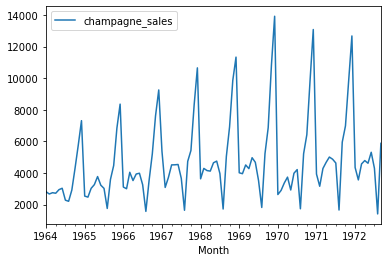

In [36]:
df.plot()

In [37]:
#The data distribution looks seasonal BUT to to test whether the data is stationary


In [38]:
#TESTING FOR STATIONARITY we use a dtfuller which is a kind of hypothesis testing where the null hypothesis states that data is not stationary.
#when p value =.o5 we reject the null hypothesis 

In [39]:
#Ho: DATA IS NOT STATIONARY
#H1: DATA IS STATIONARY


In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
test_result=adfuller(df['champagne_sales'])

In [63]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p_value','#lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("there's strong evidence reject the null hypothesis Ho, data has no unit and is stationary")
    else:
        print("weak evidence against the null hypothesis, timeseries has a unit root, showing it is non-stationary")
        

In [65]:
adfuller_test(df['champagne_sales'])

ADF Test Statistic:-1.8335930563276197
p_value:0.3639157716602465
#lags Used:11
Number of Observations Used:93
weak evidence against the null hypothesis, timeseries has a unit root, showing it is non-stationary


In [66]:
df["champagne_sales first difference"]=df["champagne_sales"]-df["champagne_sales"].shift(1)

In [67]:
#Since our data is seasonal in intervals of 12 months, we do differencing over a period of 12 months 
df["champagne_sales seasonal first difference"]=df["champagne_sales"]-df["champagne_sales"].shift(12)

In [59]:
df.head(10)

,champagne_sales,champagne_sales first difference,champagne_sales seasonal first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
1964-06-01,3036.0,NaN,NaN
1964-07-01,2282.0,NaN,NaN
1964-08-01,2212.0,NaN,NaN
1964-09-01,2922.0,NaN,NaN


In [68]:
#Testing again using dickey fuller test, and drop the missing values
adfuller_test(df["champagne_sales seasonal first difference"].dropna())

ADF Test Statistic:-7.626619157213162
p_value:2.060579696813685e-11
#lags Used:0
Number of Observations Used:92
there's strong evidence reject the null hypothesis Ho, data has no unit and is stationary


In [73]:
#AUTO REGRESSIVE MODEL
#include lags to mean how many previous values we have to consider to predict todays sales
#this can be can be done using autocorrelation plot

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#pacf will be used to find our AR model while ACF will help find the moving average model to give our(p,d,q) values required to fit our ARIMA model 

In [99]:
#IF OUR DATA WAS NON SEASONAL WE WOULD HAVE USED ARIMA IN THE STEPS BELOW
from statsmodels.tsa.arima_model import ARIMA

In [79]:
model=ARIMA(df["champagne_sales"],order=(1,1,1))
model_fit=model.fit()

C:\Users\regy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\regy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [80]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.champagne_sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 08 May 2021   AIC                           1910.251
Time:                        15:07:42   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      22.7836     12.405      1.837      0.066      -1.530      47.097
ar.L1.D.champagne_sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.champagne_sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [100]:
#AS IN OUR CASE DATA IS SEASONAL, WE WILL NOT USE ARIMA, INSTEAD WE USE SEASONAL ARIMA(SARIMAX)

In [82]:
import statsmodels.api as sm

In [83]:
model=sm.tsa.statespace.SARIMAX(df["champagne_sales"],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\regy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\regy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


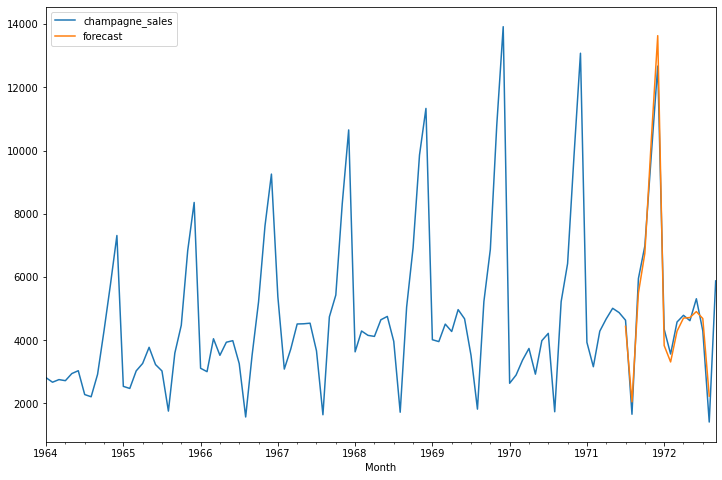

In [84]:
df["forecast"]=results.predict(start=90,end=103,dynamic=True)
df[["champagne_sales","forecast"]].plot(figsize=(12,8))

In [86]:
#TO PREDICT FUTURE VALUES
#I create ana dditional dataset of 24 months


In [88]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [91]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [92]:
future_datest_df.tail()

,champagne_sales,champagne_sales first difference,champagne_sales seasonal first difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [96]:
future_df=pd.concat([df,future_datest_df])

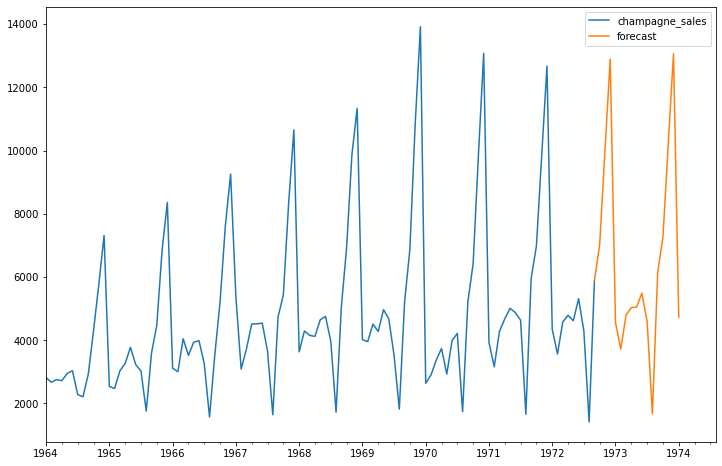

In [98]:
future_df["forecast"]=results.predict(start=104,end=120,dynamic=True)
future_df[["champagne_sales","forecast"]].plot(figsize=(12,8))